# 결측값을 특정 값으로 대체하기

In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt


C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
df = pd.DataFrame(np.random.randn(5, 3),    # 5행 3열로 정규분포를 따르는 난수를 15개 생성
                 columns=["c1", "c2", "c3"])
df


,c1,c2,c3
0,-0.165791,-0.081616,0.361801
1,0.538374,0.217626,-0.817783
2,0.713451,1.166613,-0.717115
3,0.525067,-1.496201,0.968614
4,0.443688,0.374656,-1.202796


In [5]:
dfdate = ["07/03/2019", "07/04/2019", "07/05/2019", "07/10/2019"]
dfdate

['07/03/2019', '07/04/2019', '07/05/2019', '07/10/2019']

In [6]:
myDate = pd.to_datetime(dfdate)    # string 타입의 데이터를 날짜 데이터로
myDate

DatetimeIndex(['2019-07-03', '2019-07-04', '2019-07-05', '2019-07-10'], dtype='datetime64[ns]', freq=None)

In [7]:
times = Series([1, np.nan, np.nan, 20], index=myDate)
times

2019-07-03     1.0
2019-07-04     NaN
2019-07-05     NaN
2019-07-10    20.0
dtype: float64

## NaN을 대체할 때 interpolation(보간법)을 쓰려고 한다

### interpolate 함수

In [8]:
ti = times.interpolate()
ti

2019-07-03     1.000000
2019-07-04     7.333333
2019-07-05    13.666667
2019-07-10    20.000000
dtype: float64

In [9]:
times.interpolate(method="time")    # 시간을 기준으로 interpolate
# time method는 시계열일때만 가능

2019-07-03     1.000000
2019-07-04     3.714286
2019-07-05     6.428571
2019-07-10    20.000000
dtype: float64

In [10]:
df = DataFrame({"c1": [1, 2, np.nan, np.nan, 5],
                "c2": [6, 8, 10, np.nan, 20]})
df

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,NaN,10.0
3,NaN,NaN
4,5.0,20.0


In [11]:
df.interpolate(method="values")    # NaN의 앞뒤 두칸의 값을 기준으로 보간

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,3.0,10.0
3,4.0,15.0
4,5.0,20.0


In [12]:
df.interpolate(method="values", limit=1)    # 한 칸만 보간

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,3.0,10.0
3,NaN,15.0
4,5.0,20.0


In [13]:
df.interpolate(method="values", limit=1, limit_direction="backward")    # 뒤로 보간

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,NaN,10.0
3,4.0,15.0
4,5.0,20.0


# Replace 함수로 값 대체

In [14]:
s = Series([1, 2, 3, 4, np.nan])
s

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [15]:
s.replace(np.nan, 10)

0     1.0
1     2.0
2     3.0
3     4.0
4    10.0
dtype: float64

In [16]:
s.replace(3, 100)

0      1.0
1      2.0
2    100.0
3      4.0
4      NaN
dtype: float64

In [17]:
s.replace([1, 2, 3], [5, 6, 7])

0    5.0
1    6.0
2    7.0
3    4.0
4    NaN
dtype: float64

In [18]:
s.replace({1: 10})    # mapping

0    10.0
1     2.0
2     3.0
3     4.0
4     NaN
dtype: float64

In [19]:
s.replace({1: 10, np.nan: 999})    # 딕셔너리로 매핑할때는 키를 밸류로 변경한다

0     10.0
1      2.0
2      3.0
3      4.0
4    999.0
dtype: float64

# 중복 자료를 다루기

## duplicated(): 중복된 값 찾기

In [20]:
df = pd.DataFrame({"k1": ["a", "b", "b", "c", "c"],
                   "k2": ["v", "w", "w", "x", "y"],
                   "c": [1, 2, 3, 4, 5]})
df

,k1,k2,c
0,a,v,1
1,b,w,2
2,b,w,3
3,c,x,4
4,c,y,5


In [21]:
# df.duplicated([검색 기준이 되는 키])
df.duplicated(["k1"])    # 위에서부터 찾으면서 이제까지 나온 값들 중에 중복이 있는지 찾는다. 그러므로 1번은 False이고 2번은 True이다.

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [22]:
df.duplicated(["k1", "k2"])

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [23]:
df.duplicated(["k1"], keep="first")    # first가 default

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [24]:
df.duplicated(["k1"], keep="last")    # 나중에 나온 값을 keep하겠다

0    False
1     True
2    False
3     True
4    False
dtype: bool

In [25]:
df.duplicated(["k1"], keep=False)    # 중복된 값은 다 keep하지 않겠다

0    False
1     True
2     True
3     True
4     True
dtype: bool

## duplicates(): 중복된 값 처리하기

In [26]:
df

,k1,k2,c
0,a,v,1
1,b,w,2
2,b,w,3
3,c,x,4
4,c,y,5


In [27]:
df.drop_duplicates(["k1"])    # 중복 제거

,k1,k2,c
0,a,v,1
1,b,w,2
3,c,x,4


In [28]:
df.drop_duplicates(["k1"], keep="first")    # default

,k1,k2,c
0,a,v,1
1,b,w,2
3,c,x,4


In [29]:
df.drop_duplicates(["k1"], keep="last")

,k1,k2,c
0,a,v,1
2,b,w,3
4,c,y,5


In [30]:
df.drop_duplicates(["k1"], keep=False)

,k1,k2,c
0,a,v,1


## unique(): 중복은 무시하고 데이터에 포함된 유일한 값들 출력

In [31]:
df = pd.DataFrame({"s": ["f", "m", "m", "f", "m"],
                   "d": ["a", "a", "a", "a", np.nan],
                   "c": [1, 1, 3, 4, 4]})
df

,s,d,c
0,f,a,1
1,m,a,1
2,m,a,3
3,f,a,4
4,m,NaN,4


In [32]:
df["s"].unique()

array(['f', 'm'], dtype=object)

In [33]:
df["d"].unique()

array(['a', nan], dtype=object)

## value_counts(): 각 값이 몇번 등장하는지 세기

In [34]:
df.values

array([['f', 'a', 1],
       ['m', 'a', 1],
       ['m', 'a', 3],
       ['f', 'a', 4],
       ['m', nan, 4]], dtype=object)

value_counts는 Series라는 객체의 메서드이기 때문에 dataframe이 아니라 series에 대해서만 사용 가능하다

In [35]:
df["s"].value_counts()

m    3
f    2
Name: s, dtype: int64

In [36]:
df["d"].value_counts()    # NaN의 존재는 value_counts로 확인할 수 없다

a    4
Name: d, dtype: int64

### normalize

In [37]:
df["s"].value_counts(normalize=True)    # 각 값이 몇 퍼센트 있는지 비율로 출력

m    0.6
f    0.4
Name: s, dtype: float64

### sort

In [38]:
df["c"]

0    1
1    1
2    3
3    4
4    4
Name: c, dtype: int64

In [39]:
df["c"].value_counts(sort=True)    # 개수를 기준으로 정렬 (default는 내림차순)

4    2
1    2
3    1
Name: c, dtype: int64

In [40]:
df["c"].value_counts(sort=True, ascending=True)    # 개수를 기준으로 오름차순 정렬

3    1
1    2
4    2
Name: c, dtype: int64

### dropna

In [41]:
df["d"]

0      a
1      a
2      a
3      a
4    NaN
Name: d, dtype: object

In [42]:
df["d"].value_counts(dropna=False)    # dropna: NaN이 몇건인지도 확인하고 싶을 때 False로 설정 (default는 True)

a      4
NaN    1
Name: d, dtype: int64

### bins

bins: 연속형 변수에 대해서 구간별로 데이터가 몇건씩 있는지 조사할 때 사용하는 옵션

In [43]:
df

,s,d,c
0,f,a,1
1,m,a,1
2,m,a,3
3,f,a,4
4,m,NaN,4


In [44]:
df["c"].value_counts(sort=False)

1    2
3    1
4    2
Name: c, dtype: int64

In [45]:
df["c"].value_counts(sort=False, bins=[0, 1, 2, 3, 4])

(-0.001, 1.0]    2
(1.0, 2.0]       0
(2.0, 3.0]       1
(3.0, 4.0]       2
Name: c, dtype: int64

* 소괄호는 개구간, 대괄호는 폐구간을 뜻한다
* 개구간은 포함하지 않고 폐구간은 포함한다.
    * 즉, (1.0, 2.0]은 1을 포함하지 않고 2를 포함한다. 1초과 2이하.

In [46]:
pd.cut(df["c"], bins=[0, 1, 2, 3, 4])

0    (0, 1]
1    (0, 1]
2    (2, 3]
3    (3, 4]
4    (3, 4]
Name: c, dtype: category
Categories (4, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4]]

In [47]:
res = pd.cut(df["c"], bins=[0, 1, 2, 3, 4])
pd.value_counts(res)    # 각 구간별로 몇건씩 있는지

(3, 4]    2
(0, 1]    2
(2, 3]    1
(1, 2]    0
Name: c, dtype: int64

# 표준화

표준화: 분석작업을 할 때 변수간 스케일이 다른 경우에도 변수간 비교를 하기 위해 필요한 작업

In [48]:
data = np.random.randint(20, size=(6,5))
data

array([[19, 18, 14, 16, 13],
       [13, 11, 12,  6,  5],
       [ 0,  5,  3,  7, 18],
       [15, 13,  4, 17,  3],
       [19, 18,  9,  9,  1],
       [16, 17,  3, 11,  4]])

## 01. numpy 표준화

표준화 수식: ((각 열의 데이터) - (각 열의 평균)) / (각 열의 표준편차)

Z = (x-mean())/std()

In [49]:
np.mean(data)    # 전체 평균

10.633333333333333

In [50]:
np.mean(data, axis=0)

array([13.66666667, 13.66666667,  7.5       , 11.        ,  7.33333333])

In [51]:
data-np.mean(data, axis=0)

array([[  5.33333333,   4.33333333,   6.5       ,   5.        ,
          5.66666667],
       [ -0.66666667,  -2.66666667,   4.5       ,  -5.        ,
         -2.33333333],
       [-13.66666667,  -8.66666667,  -4.5       ,  -4.        ,
         10.66666667],
       [  1.33333333,  -0.66666667,  -3.5       ,   6.        ,
         -4.33333333],
       [  5.33333333,   4.33333333,   1.5       ,  -2.        ,
         -6.33333333],
       [  2.33333333,   3.33333333,  -4.5       ,   0.        ,
         -3.33333333]])

In [52]:
std_data = (data-np.mean(data, axis=0))/np.std(data, axis=0)
std_data

array([[ 0.82404192,  0.92621165,  1.46882498,  1.18957738,  0.93299621],
       [-0.10300524, -0.5699764 ,  1.01687883, -1.18957738, -0.38417491],
       [-2.11160743, -1.8524233 , -1.01687883, -0.9516619 ,  1.75622816],
       [ 0.20601048, -0.1424941 , -0.79090576,  1.42749285, -0.71346769],
       [ 0.82404192,  0.92621165,  0.33895961, -0.47583095, -1.04276047],
       [ 0.36051834,  0.7124705 , -1.01687883,  0.        , -0.5488213 ]])

In [53]:
np.mean(std_data, axis=0)    # 표준화 했으므로 각 열의 평균 = 0

array([ 7.40148683e-17,  1.11022302e-16, -3.70074342e-17, -9.25185854e-18,
        7.40148683e-17])

In [54]:
np.std(std_data, axis=0)    # 표준화 했으므로 각 열의 표준편차 = 1

array([1., 1., 1., 1., 1.])

## 02. scipy 표준화

In [55]:
import scipy.stats as ss
ss.zscore(data)

array([[ 0.82404192,  0.92621165,  1.46882498,  1.18957738,  0.93299621],
       [-0.10300524, -0.5699764 ,  1.01687883, -1.18957738, -0.38417491],
       [-2.11160743, -1.8524233 , -1.01687883, -0.9516619 ,  1.75622816],
       [ 0.20601048, -0.1424941 , -0.79090576,  1.42749285, -0.71346769],
       [ 0.82404192,  0.92621165,  0.33895961, -0.47583095, -1.04276047],
       [ 0.36051834,  0.7124705 , -1.01687883,  0.        , -0.5488213 ]])

## 03. sklearn 표준화

### StandardScaler

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
std_data = StandardScaler().fit_transform(data)
std_data

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.82404192,  0.92621165,  1.46882498,  1.18957738,  0.93299621],
       [-0.10300524, -0.5699764 ,  1.01687883, -1.18957738, -0.38417491],
       [-2.11160743, -1.8524233 , -1.01687883, -0.9516619 ,  1.75622816],
       [ 0.20601048, -0.1424941 , -0.79090576,  1.42749285, -0.71346769],
       [ 0.82404192,  0.92621165,  0.33895961, -0.47583095, -1.04276047],
       [ 0.36051834,  0.7124705 , -1.01687883,  0.        , -0.5488213 ]])

* StandardScaler는 이상치(outlier)가 없다는 가정 하에 표준화를 실행하게 된다
* 만약 내가 표준화 해야하는 데이터에 이상치가 포함되어 있다면, 이상치를 먼저 제거한 후에 표준화 작업을 해야 한다
* 이상치를 삭제하지 못하는 상태에서 표준화를 해야할 때 사용하는게 RobustScaler

### RobustScaler

* 이상치, 특이값이 포함되어있는 데이터의 표준화에 사용한다.
* 평균, 표준편차는 이상치의 영향을 크게 받는다(민감하다)
* 중앙값(Q2), IQR(Q3-Q1)
* robustscaler = x-median()/IQR

In [58]:
np.random.seed(73)
mu, sigma = 10, 3    # 평균이 10, 표준편차가 3
x = mu + sigma * np.random.randn(100)
x

array([11.73043915, 16.39332639, 17.320659  , 10.78998062,  5.51163806,
        9.88979408, 11.29208736,  5.41157701,  7.80922097, 13.15394571,
       14.85937801,  5.18495989, 10.9930286 ,  9.36714293, 10.8945301 ,
        6.56177945, 11.72608607,  8.9082801 , 10.10919758,  8.43830804,
        9.952707  ,  9.86247581,  8.14476643,  7.54049167, 11.52942571,
       13.15181833, 10.43509572,  8.97743181, 13.73237532, 14.96745496,
        9.18100947,  8.92022193,  0.07338429, 13.15509679,  9.32104691,
        8.01247213, 12.73917563, 12.76350652, 12.71635723,  8.54749669,
        7.85535142, 10.54716188, 11.73015021,  5.30930238, 15.6590461 ,
        6.80288206, 10.33849318,  8.23193967, 11.93280031, 10.91541905,
       11.85215573, 13.29726519,  8.69230361, 11.19550648, 10.01848898,
        4.93669823, 10.0159642 , 12.36761596, 11.77181612,  6.89236123,
       13.12230939,  8.03537406,  8.08006912, 11.32291988,  9.03981268,
       14.20361445, 10.5615933 , 12.96978103,  9.91591744, 10.50

(array([ 1.,  1.,  4.,  9., 19., 26., 20., 11.,  5.,  4.]),
 array([ 0.07338429,  1.85408523,  3.63478617,  5.41548711,  7.19618805,
         8.97688899, 10.75758993, 12.53829087, 14.31899181, 16.09969276,
        17.8803937 ]),
 <a list of 10 Patch objects>)

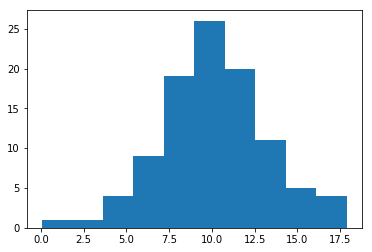

In [59]:
import matplotlib.pyplot as plt
plt.hist(x)

In [60]:
np.mean(x)

10.147389546015

In [61]:
np.std(x)

3.014695610662603

In [62]:
x[95:100] = 100
x

array([1.17304392e+01, 1.63933264e+01, 1.73206590e+01, 1.07899806e+01,
       5.51163806e+00, 9.88979408e+00, 1.12920874e+01, 5.41157701e+00,
       7.80922097e+00, 1.31539457e+01, 1.48593780e+01, 5.18495989e+00,
       1.09930286e+01, 9.36714293e+00, 1.08945301e+01, 6.56177945e+00,
       1.17260861e+01, 8.90828010e+00, 1.01091976e+01, 8.43830804e+00,
       9.95270700e+00, 9.86247581e+00, 8.14476643e+00, 7.54049167e+00,
       1.15294257e+01, 1.31518183e+01, 1.04350957e+01, 8.97743181e+00,
       1.37323753e+01, 1.49674550e+01, 9.18100947e+00, 8.92022193e+00,
       7.33842885e-02, 1.31550968e+01, 9.32104691e+00, 8.01247213e+00,
       1.27391756e+01, 1.27635065e+01, 1.27163572e+01, 8.54749669e+00,
       7.85535142e+00, 1.05471619e+01, 1.17301502e+01, 5.30930238e+00,
       1.56590461e+01, 6.80288206e+00, 1.03384932e+01, 8.23193967e+00,
       1.19328003e+01, 1.09154191e+01, 1.18521557e+01, 1.32972652e+01,
       8.69230361e+00, 1.11955065e+01, 1.00184890e+01, 4.93669823e+00,
      

In [63]:
np.mean(x)

14.717851743813155

In [64]:
np.std(x)

19.790826557586872

(array([48., 47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([7.33842885e-02, 1.00660459e+01, 2.00587074e+01, 3.00513690e+01,
        4.00440306e+01, 5.00366921e+01, 6.00293537e+01, 7.00220153e+01,
        8.00146769e+01, 9.00073384e+01, 1.00000000e+02]),
 <a list of 10 Patch objects>)

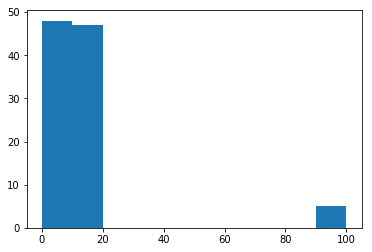

In [65]:
plt.hist(x)

(array([ 1.,  1.,  7.,  8., 29., 25., 14.,  6.,  4.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

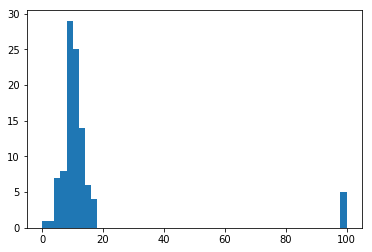

In [66]:
plt.hist(x, bins=np.arange(0, 101, 2))    # bins 속성을 통해 구간을 정해줄 수 있다

#### 이상치를 무시하고 그냥 StandardScaler를 사용했을 때

In [67]:
np.shape(x)     # 1차원

(100,)

In [68]:
x = x.reshape(-1,1)     # 2차원으로 변형    # numpy에서 -1의 의미는 '니가 알아서 계산해' 이다 (딥러닝에서는 None으로 쓴다))
np.shape(x)

(100, 1)

In [69]:
std_x = StandardScaler().fit_transform(x)
std_x

array([[-0.15094936],
       [ 0.08465915],
       [ 0.13151584],
       [-0.19846928],
       [-0.46517581],
       [-0.24395432],
       [-0.1730986 ],
       [-0.47023174],
       [-0.34908248],
       [-0.07902176],
       [ 0.0071511 ],
       [-0.48168235],
       [-0.18820958],
       [-0.27036308],
       [-0.19318656],
       [-0.41211378],
       [-0.15116931],
       [-0.29354871],
       [-0.2328682 ],
       [-0.31729568],
       [-0.24077543],
       [-0.24533467],
       [-0.33212788],
       [-0.36266096],
       [-0.16110626],
       [-0.07912926],
       [-0.21640107],
       [-0.29005458],
       [-0.04979461],
       [ 0.01261207],
       [-0.27976812],
       [-0.29294531],
       [-0.7399624 ],
       [-0.0789636 ],
       [-0.27269224],
       [-0.33881251],
       [-0.09997946],
       [-0.09875006],
       [-0.10113244],
       [-0.31177854],
       [-0.34675158],
       [-0.21073854],
       [-0.15096396],
       [-0.47539952],
       [ 0.0475571 ],
       [-0

* 위 표준화 결과를 보면 마지막에 4점대의 이상치들이 그대로 나와있다

In [70]:
print(np.mean(std_x))
print(np.std(std_x))

5.329070518200751e-17
1.0


* 수치상으로는 평균 0, 표준편차 1로 문제없어 보인다. 그러나...

(array([48., 47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([7.33842885e-02, 1.00660459e+01, 2.00587074e+01, 3.00513690e+01,
        4.00440306e+01, 5.00366921e+01, 6.00293537e+01, 7.00220153e+01,
        8.00146769e+01, 9.00073384e+01, 1.00000000e+02]),
 <a list of 10 Patch objects>)

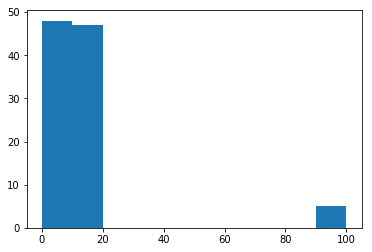

In [71]:
plt.hist(x)

* 그래프를 그려보면 표준화분포가 전혀 아니다

In [72]:
std_x < 4

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [73]:
std_o = std_x[std_x < 4]
std_o

array([-0.15094936,  0.08465915,  0.13151584, -0.19846928, -0.46517581,
       -0.24395432, -0.1730986 , -0.47023174, -0.34908248, -0.07902176,
        0.0071511 , -0.48168235, -0.18820958, -0.27036308, -0.19318656,
       -0.41211378, -0.15116931, -0.29354871, -0.2328682 , -0.31729568,
       -0.24077543, -0.24533467, -0.33212788, -0.36266096, -0.16110626,
       -0.07912926, -0.21640107, -0.29005458, -0.04979461,  0.01261207,
       -0.27976812, -0.29294531, -0.7399624 , -0.0789636 , -0.27269224,
       -0.33881251, -0.09997946, -0.09875006, -0.10113244, -0.31177854,
       -0.34675158, -0.21073854, -0.15096396, -0.47539952,  0.0475571 ,
       -0.39993123, -0.22128225, -0.32772315, -0.14072436, -0.19213107,
       -0.14479921, -0.07178005, -0.30446167, -0.17797868, -0.23745157,
       -0.49422663, -0.23757914, -0.1187538 , -0.14885864, -0.39540999,
       -0.0806203 , -0.33765531, -0.33539694, -0.17154068, -0.28690257,
       -0.02598362, -0.21000934, -0.08832732, -0.24263435, -0.21

(array([ 1.,  1.,  4.,  8., 17., 24., 20., 11.,  5.,  4.]),
 array([-0.7399624 , -0.64998632, -0.56001024, -0.47003416, -0.38005809,
        -0.29008201, -0.20010593, -0.11012986, -0.02015378,  0.0698223 ,
         0.15979838]),
 <a list of 10 Patch objects>)

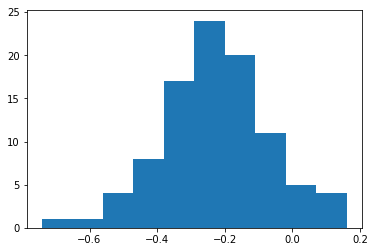

In [74]:
plt.hist(std_o)

* 이상치를 제거하니까 이제야 그래프가 그럴듯하게 나온다.

#### RobustScaler를 사용해서 이상치를 처리했을 때

In [75]:
np.mean(x)

14.717851743813155

In [76]:
np.median(x)

10.386794450839528

In [77]:
Q1 = np.percentile(x, 25)    # 100분위에서 25분위 수 (=25% 지점 = Q1) 를 얻고 싶다
Q3 = np.percentile(x, 75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
print(IQR)

8.435859129640745
12.534014070784306
4.0981549411435605


In [78]:
rbs_x = RobustScaler().fit_transform(x)    # x-median()/IQR 을 실행한 결과가 나온다
rbs_x

array([[ 3.27865765e-01],
       [ 1.46566736e+00],
       [ 1.69194788e+00],
       [ 9.83823630e-02],
       [-1.18959787e+00],
       [-1.21274179e-01],
       [ 2.20902557e-01],
       [-1.21401399e+00],
       [-6.28959499e-01],
       [ 6.75218799e-01],
       [ 1.09136517e+00],
       [-1.26931134e+00],
       [ 1.47928556e-01],
       [-2.48807460e-01],
       [ 1.23893718e-01],
       [-9.33350510e-01],
       [ 3.26803559e-01],
       [-3.60775612e-01],
       [-6.77370358e-02],
       [-4.75454548e-01],
       [-1.05922655e-01],
       [-1.27940169e-01],
       [-5.47082297e-01],
       [-6.94532739e-01],
       [ 2.78816023e-01],
       [ 6.74699692e-01],
       [ 1.17861007e-02],
       [-3.43901747e-01],
       [ 8.16362710e-01],
       [ 1.11773727e+00],
       [-2.94226304e-01],
       [-3.57861657e-01],
       [-2.51659840e+00],
       [ 6.75499676e-01],
       [-2.60055454e-01],
       [-5.79363727e-01],
       [ 5.74009819e-01],
       [ 5.79946854e-01],
       [ 5.6

In [79]:
np.median(rbs_x)

0.0

In [80]:
np.mean(rbs_x)

1.0568310264435923

In [81]:
np.std(rbs_x)

4.829204078863935

(array([48., 47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([-2.5165984 , -0.07826658,  2.36006523,  4.79839704,  7.23672886,
         9.67506067, 12.11339248, 14.5517243 , 16.99005611, 19.42838793,
        21.86671974]),
 <a list of 10 Patch objects>)

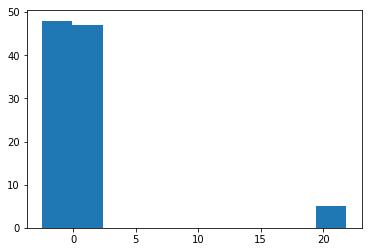

In [82]:
plt.hist(rbs_x)

In [83]:
rbs_o = rbs_x[rbs_x<5]

(array([ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  5.,  2.,  4.,  4., 11.,
        12., 10., 11., 10.,  7.,  6.,  2.,  4.,  1.,  2.,  1.,  1.,  0.,
         0.,  0.,  0.]),
 array([-3.00000000e+00, -2.80000000e+00, -2.60000000e+00, -2.40000000e+00,
        -2.20000000e+00, -2.00000000e+00, -1.80000000e+00, -1.60000000e+00,
        -1.40000000e+00, -1.20000000e+00, -1.00000000e+00, -8.00000000e-01,
        -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,  2.66453526e-15,
         2.00000000e-01,  4.00000000e-01,  6.00000000e-01,  8.00000000e-01,
         1.00000000e+00,  1.20000000e+00,  1.40000000e+00,  1.60000000e+00,
         1.80000000e+00,  2.00000000e+00,  2.20000000e+00,  2.40000000e+00,
         2.60000000e+00,  2.80000000e+00]),
 <a list of 29 Patch objects>)

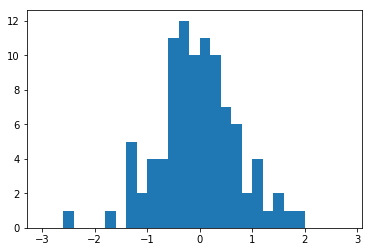

In [84]:
plt.hist(rbs_o, bins=np.arange(-3, 3, 0.2))

# 정규화

정규화 = (각 열의 요소값 - 각 열의 최소값) / (각 열의 최대값 - 각 열의 최소값)

정규화는 0~1사이의 범위를 갖는다.

딥러닝에서 정규화가 많이 사용된다.

## 수동으로 정규화

In [90]:
x = np.array([[9, -9, 2],
             [5, 0, 1],
             [1, 10, 4],
             [4, 7, -2]])
x

array([[ 9, -9,  2],
       [ 5,  0,  1],
       [ 1, 10,  4],
       [ 4,  7, -2]])

In [91]:
x.min()    # 각 열이 아니라 전체의 최소값. 원하는게 아니다.

-9

In [93]:
x.min(axis=0)    # 열 단위 최소값 (axis=1이면 행 단위)

array([ 1, -9, -2])

In [94]:
x.max(axis=0)

array([ 9, 10,  4])

In [96]:
# 정규화 공식: (각 열의 요소값 - 각 열의 최소값) / (각 열의 최대값 - 각 열의 최소값)
(x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))    # 브로드캐스팅을 통해 계산됨

array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.47368421, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.84210526, 0.        ]])

## MinMaxScaler 사용

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
x_minmax = MinMaxScaler().fit_transform(x)
x_minmax

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.47368421, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.84210526, 0.        ]])

In [99]:
from sklearn.preprocessing import minmax_scale

In [100]:
minmax_scale(x, axis=0)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.47368421, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.84210526, 0.        ]])

# 이항변수화 (Binarizer)

연속형 변수 값을 0 아니면 1로 바꿔놓는 것

In [101]:
from sklearn.preprocessing import Binarizer

In [102]:
np.array([[5, -3, 2],
          [7, -1, 0],
          [0, 9, 5]])

array([[ 5, -3,  2],
       [ 7, -1,  0],
       [ 0,  9,  5]])

In [104]:
Binarizer().fit(x)    # default threshold는 0

Binarizer(copy=True, threshold=0.0)

In [111]:
# 임의로 그냥 2를 기준(threshold)으로 바이너리화 하겠다
Binarizer(2).fit(x)

Binarizer(copy=True, threshold=2)

In [113]:
bnr = Binarizer(2).fit(x)

print(x)
print(bnr.transform(x))    # 역치 기준으로 역치 이하는 0, 역치 초과는 1 (역치는 0에 포함)

[[ 9 -9  2]
 [ 5  0  1]
 [ 1 10  4]
 [ 4  7 -2]]
[[1 0 0]
 [1 0 0]
 [0 1 1]
 [1 1 0]]
